<a href="https://colab.research.google.com/github/iamabhaydawar/learn_mL/blob/main/bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [5]:
dataset_cols=["Date","bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","Seasons","Holiday","functional"]
df=pd.read_csv("SeoulBikeData.csv",encoding="ISO-8859-1",names=dataset_cols,header=0)

In [6]:
df.head()

,Date,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,Seasons,Holiday,functional
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df = df.drop(columns=['Date', 'Holiday', 'Seasons'])
display(df.head())

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [8]:
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(columns=["hour"])

In [9]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


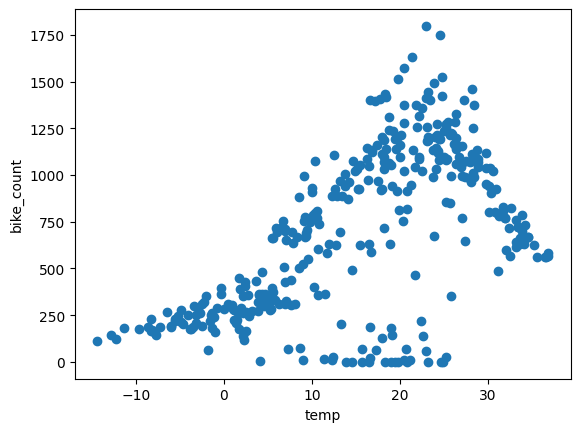

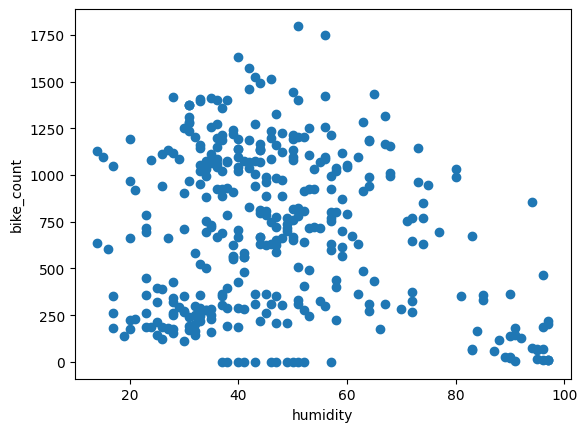

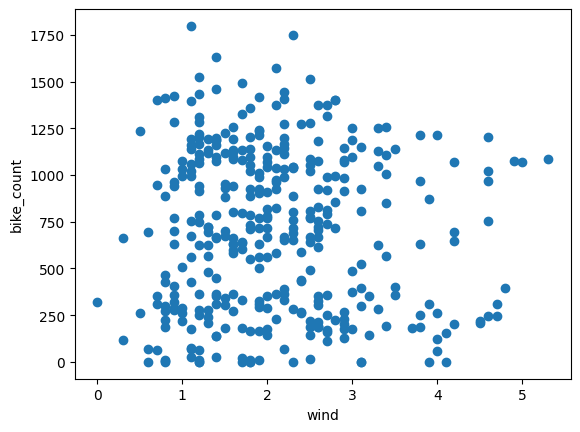

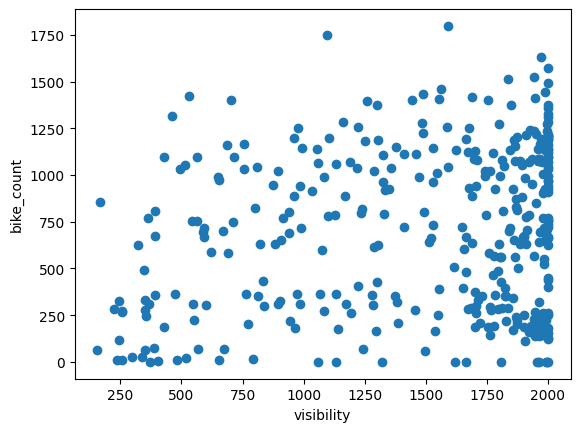

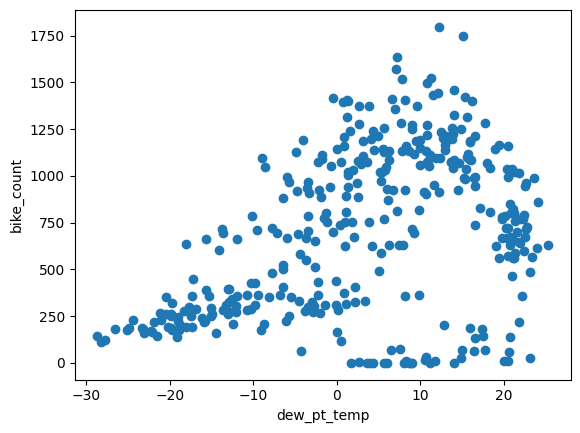

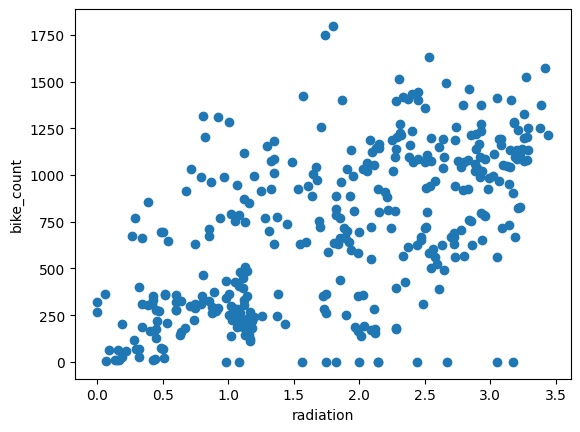

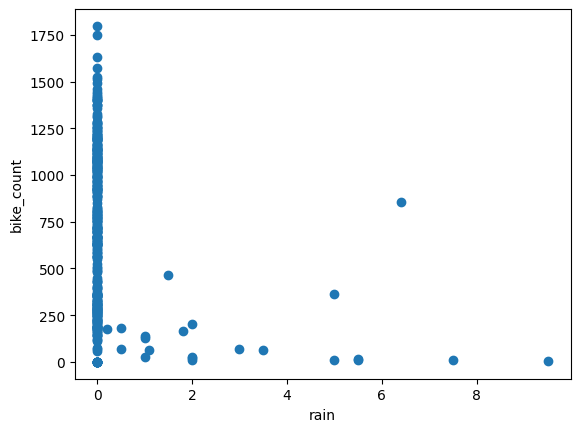

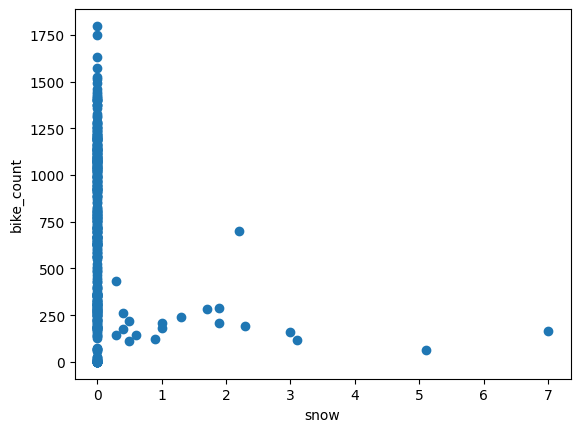

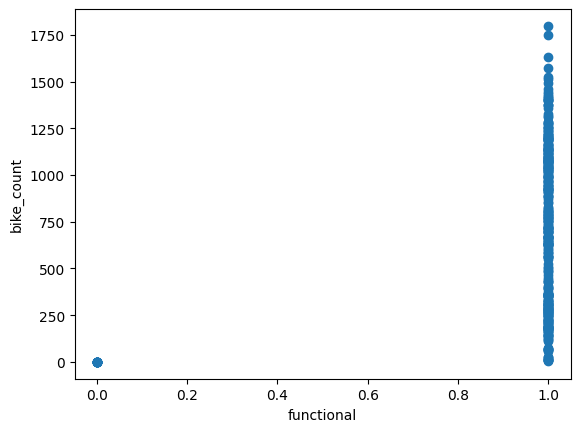

In [10]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.xlabel(label)
  plt.ylabel("bike_count")
  plt.show()

In [11]:


df = df.drop(columns=["wind", "visibility", "functional"])
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test

In [70]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [72]:
_,X_train_temp,y_train_temp=get_xy(train,"bike_count",x_labels=["temp"])
_,X_val_temp,y_val_temp=get_xy(val,"bike_count",x_labels=["temp"])
_,X_test_temp,y_test_temp=get_xy(test,"bike_count",x_labels=["temp"])



In [15]:
temp_reg =LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [16]:
print("coefficient of the regressor",temp_reg.coef_,"y_intercept",temp_reg.intercept_)

coefficient of the regressor [[18.70175048]] y_intercept [402.56383878]


In [17]:
temp_reg.score(X_train_temp,y_train_temp)

0.28571093732832453

Text(0, 0.5, 'bike_count')

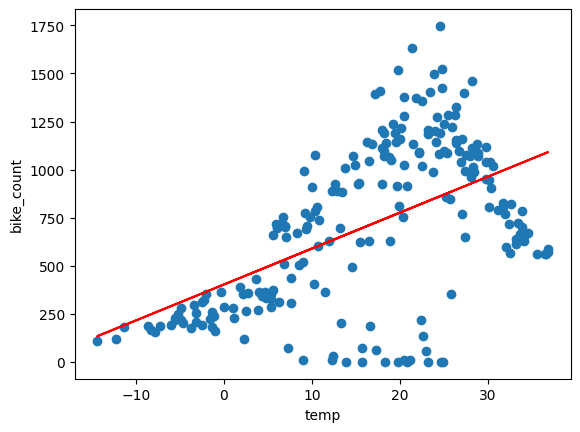

In [18]:
plt.scatter(X_train_temp,y_train_temp)
plt.plot(X_train_temp,temp_reg.predict(X_train_temp),color="red")
plt.xlabel("temp")
plt.ylabel("bike_count")

Text(0, 0.5, 'bike_count')

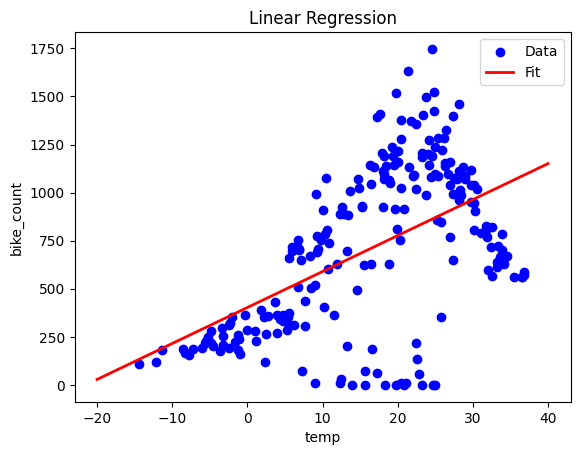

In [23]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=2)
plt.legend()
plt.title("Linear Regression")
plt.xlabel("temp")
plt.ylabel("bike_count")

# Multiple linear regression

In [24]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [73]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

_,X_train_all,y_train_all=get_xy(train,"bike_count",x_labels=df.columns[1:])
_,X_val_all,y_val_all=get_xy(val,"bike_count",x_labels=df.columns[1:])
_,X_test_all,y_test_all=get_xy(test,"bike_count",x_labels=df.columns[1:])



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [44]:
all_reg.score(X_test_all,y_test_all)

0.4292541752030916

# Regression with a Neural-Net

In [83]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [42]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1,1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [81]:
temp_nn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [84]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1,1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

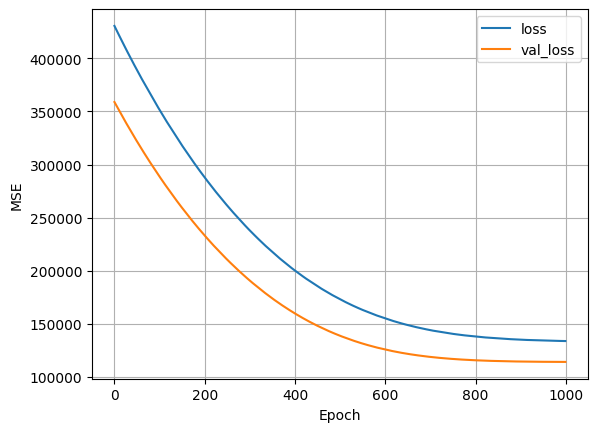

In [85]:
plot_loss(history)